In [1]:
#Esto me sirve para el correcto funcionamiento de las funciones importadas en este notebook
%load_ext autoreload
%autoreload 2

# Prueba final 

Cargamos los conjuntos de datos y librerías que se usarán en esta sección:

In [3]:
from utils.paths import crear_funcion_directorio
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from utils.modeling import mostrar_podio_MVP
from utils.visualize import plotear_predvsreal
from joblib import load
import numpy as np
import pandas as pd

#Creo un acceso directo a la carpeta de data
data_dir = crear_funcion_directorio("data")

#Cargo los conjuntos de datos
X_test = pd.read_csv(data_dir("for_modeling", "X_test.csv"))
y_test = pd.read_csv(data_dir("for_modeling", "y_test.csv"))
df_data_jugadores_test = pd.read_csv(data_dir("processed", "df_data_jugadores_test.csv"))

#Cargo el modelo y el pipeline
pip = load(data_dir("for_modeling", "pipeline.joblib"))
forest_reg = load(data_dir("for_modeling", "forest_reg.joblib"))

## Observando las métricas del modelo en la prueba

Luego de seleccionar el modelo que consideramos **óptimo** para los objetivos de nuestro proyecto, nos embarcamos en la última fase: **evaluar su rendimiento con datos de prueba**. Esta etapa implica poner a prueba nuestro modelo utilizando los conjuntos de datos reservados para cada jugador desde el inicio del proyecto con este propósito específico.

Empezamos por generar las predicciones para todo el conjunto de prueba:

In [4]:
X_test_prepared = pip.transform(X_test)

#Tomo el modelo y hago las predicciones en test
y_test_pred = forest_reg.predict(X_test_prepared)

Ahora, al igual que hicimos con los datos de entrenamiento, vamos a evaluar las métricas de este modelo para el dataset de prueba:

In [5]:
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("Métricas en el conjunto de entrenamiento:")
print(f"Coeficiente de determinación (R²): {r2_test:.4f}")
print(f"Varianza explicada: {explained_variance_test:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_test:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_test:.4f}")

Métricas en el conjunto de entrenamiento:
Coeficiente de determinación (R²): 0.6791
Varianza explicada: 0.6802
MSE (Error Cuadrático Medio): 0.0213
RMSE (Raíz del Error Cuadrático Medio): 0.1459


De estas métricas, podemos apreciar que, aunque no logró un rendimiento tan cercano al obtenido con los datos de entrenamiento (lo cual es común), aún mantenemos **métricas bastante razonables**. Esto indica que nuestro modelo no ha caído en un **caso de subajuste** y sugiere que puede alcanzar un rendimiento aceptable al evaluarlo con otras métricas.

Ahora procedemos a ver gráficamente como se comparan las predicciones de nuestro modelo respecto del valor real que toma la variable **'mvp_share'**:

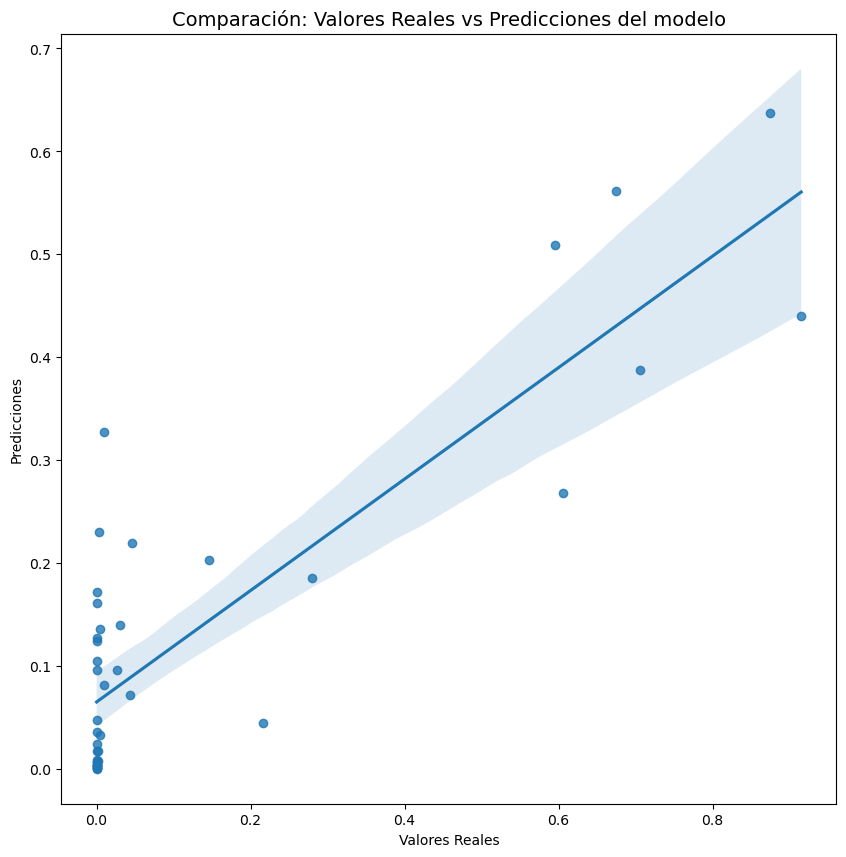

In [8]:
plotear_predvsreal(y_test, y_test_pred, tamanio= (10,10))

De este gráfico, podemos observar que las predicciones generadas por nuestro modelo están algo más dispersas en comparación con la línea azul de regresión. Además, notamos que, para valores altos de **'y_test'**, la variabilidad de los datos aumenta, lo cual podría conducir a algunas sorpresas al momento de presentar los podios predichos por nuestro modelo. A pesar de esto, hay que resaltar que nuestro modelo ha logrado mantener la tendencia general de los datos.

## Armando podios

Ahora como evaluación final, vamos a ver que tan bien nuestro modelo logra pocisionar a los jugadores reservados para la prueba para así luego sacar nuestras conclusiones sobre lo obtenido:

In [9]:
mostrar_podio_MVP(df_base= df_data_jugadores_test, columna_temporadas= 'season', columna_nombre= 'player', columna_votos= 'mvp_share', temporada= 2022, y_pred= y_test_pred, cant_jugadores= 5)

,season,player,mvp_share,y_pred
35,2022,Nikola Jokić,0.875,0.637273
15,2022,Giannis Antetokounmpo,0.595,0.508890
25,2022,Joel Embiid,0.706,0.387442
33,2022,Luka Dončić,0.146,0.202774
31,2022,LeBron James,0.001,0.171963


In [10]:
mostrar_podio_MVP(df_base= df_data_jugadores_test, columna_temporadas= 'season', columna_nombre= 'player', columna_votos= 'mvp_share', temporada= 2023, y_pred= y_test_pred, cant_jugadores= 5)

,season,player,mvp_share,y_pred
34,2023,Nikola Jokić,0.674,0.561350
24,2023,Joel Embiid,0.915,0.440522
32,2023,Luka Dončić,0.010,0.327712
14,2023,Giannis Antetokounmpo,0.606,0.268350
22,2023,Jimmy Butler,0.003,0.230404


De esta evaluación resaltamos lo siguiente:

* Se mantuvo la diferencia entre **'mvp_share'** y **'y_pred'**
* El modelo acertó al ganador del premio para la **temporada 21-22**, pero fallamos en la **22-23**


Aunque no acertamos en todos los casos (cosa que no está mal), este modelo posicionó a algunos jugadores en el podio que **resulta interesante discutir**
y tratar de deducir porque fueron colocados ahí, como en el caso de la **22-23** donde el modelo **da por ganador a Jokić**.